In [ ]:
# 2일차 수업을 위한 추가 모듈 설치
!pip install torchinfo JAEN -U

INFO: pip is looking at multiple versions of langchain-openai to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 758.7 kB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 2

## 모듈 import

In [ ]:
import torch  # PyTorch의 핵심 라이브러리
import torch.nn as nn  # 신경망을 구성하는데 필요한 모듈들을 포함하는 패키지
import torch.optim as optim  # 다양한 최적화 알고리즘을 제공하는 패키지
from torchvision import datasets, transforms  # 컴퓨터 비전용 데이터셋과 데이터 변환을 위한 패키지
from torch.utils.data import DataLoader  # 데이터셋을 배치 단위로 로딩할 수 있게 도와주는 유틸리티
from torchinfo import summary  # 모델 구조를 요약해서 출력해주는 라이브러리 (모델 구조 파악용)
from JAEN.utils import plot_training_results  # 학습 결과를 시각화하는 유틸리티 함수 (외부 라이브러리)

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# 심층신경망 - FashionMNIST
- Fashion-MNIST는 머신러닝과 딥러닝에서 이미지 분류 작업을 수행할 때 자주 사용되는 벤치마크 데이터세트
    - Zalando라는 독일의 온라인 패션 소매업체에서 제공하는 의류와 액세서리 이미지를 사용
- MNIST 데이터세트(숫자 손글씨 이미지 데이터세트)을 대체하거나 보완하기 위해 만들어졌으며, 패션 아이템에 대한 이미지로 구성
    - 훈련 데이터: 60,000개의 훈련 샘플
    - 테스트 데이터: 10,000개의 테스트 샘플
    - 이미지 크기: 28x28 픽셀의 회색조 이미지 (Grayscale)
    - 클래스 수: 10개의 서로 다른 패션 아이템
    - 클래스 이미지 채널: 단일 채널 (Grayscale)

| 클래스 번호 | 클래스 이름  | 한국어 설명     |
|-------------|--------------|----------------|
| 0           | T-shirt/top  | 티셔츠/탑      |
| 1           | Trouser      | 바지           |
| 2           | Pullover     | 풀오버 (스웨터)|
| 3           | Dress        | 드레스         |
| 4           | Coat         | 코트           |
| 5           | Sandal       | 샌들           |
| 6           | Shirt        | 셔츠           |
| 7           | Sneaker      | 스니커즈       |
| 8           | Bag          | 가방           |
| 9           | Ankle boot   | 앵클 부츠      |

![](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

## 데이터 로드

In [ ]:
# 데이터 변환
# transforms.Compose : 여러 데이터 변환(transform) 작업을 순차적으로 수행할 수 있도록 묶어주는 파이프라인
transform = transforms.Compose([
    transforms.ToTensor(),   # 이미지를 텐서로 변환하고 [0, 1] 범위로 정규화
    transforms.Normalize((0.5,), (0.5,))  # 이미지의 평균과 표준편차로 [-1,1] 범위로 표준화
])
# -1에서 1 사이로 변환하면 모델의 활성화 함수가 더 잘 동작하고,
# 기울기 소실 문제를 완화시켜 학습이 더 효율적이고 안정적

In [ ]:
# 학습 및 테스트 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26421880/26421880 [00:11<00:00, 2272373.41it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203659.91it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 883781.74it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22055441.26it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# 훈련 데이터 로더(train_loader) 생성
# • train_dataset: 훈련에 사용할 데이터셋
# • batch_size=64: 모델이 한 번에 처리할 데이터의 묶음 크기 (배치 크기)를 64로 설정
# • shuffle=True: 데이터를 섞어서 제공하여 모델이 데이터 순서에 의존하지 않도록 함

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# 테스트 데이터 로더(test_loader) 생성
# • test_dataset: 테스트에 사용할 데이터셋
# • batch_size=1000: 배치 크기를 1000으로 설정 (테스트 데이터 전체 크기)
# • shuffle=False: 테스트 데이터는 순서대로 제공하여 일관된 평가를 수행함
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [ ]:
class reshapeMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model = reshapeMNISTModel().to(device)

In [ ]:
# 4차원 텐서 예시 (배치 크기 1, 채널 1, 높이 2, 너비 2)
x = torch.tensor([[[[1, 2], [3, 4]]]])
flatten = nn.Flatten() # Flatten 모듈 생성
output = flatten(x) # Flatten 적용
output# 출력 텐서: [[1, 2, 3, 4]]

tensor([[1, 2, 3, 4]])

## 심층신경망 모델 정의

In [ ]:
# 1. nn.Sequential 로 정의내리기
# 모델이 복잡해지면 유연성이 부족해지기 떄문에 보통 사용하지 않음
model = nn.Sequential(
    nn.Flatten(),                # 28x28 이미지를 1차원 벡터로 펼침
    nn.Linear(28*28, 128),       # 입력: 28*28 픽셀, 출력: 128개의 노드
    nn.ReLU(),                   # ReLU 활성화 함수
    nn.Linear(128, 10)           # 출력층: 10개의 클래스
)

# 모델 인스턴스 생성
model.to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─ReLU: 1-3                              [10, 128]                 --
├─Linear: 1-4                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
# 2. class를 사용하여 모델 정의하기
# 일반적인 방법

class FashionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()  # 부모 클래스인 nn.Module의 초기화 메서드를 호출하여 상속받은 속성과 메서드를 사용할 수 있도록 함.

        # 모델의 층 정의
        self.flatten = nn.Flatten()  # 입력 이미지(28x28)를 1차원 벡터로 펼침. 길이 784 (28*28)인 벡터로 변환. 2차원 텐서(배치크기, 이미지1차원벡터)
        self.fc1 = nn.Linear(28*28, 128)  # 완전 연결층(Fully Connected Layer).
                                          # 입력: 784(28*28)개 (이미지의 모든 픽셀), 출력: 128개의 노드 (은닉층).

        self.fc2 = nn.Linear(128, 10)     # 출력층.
                                          # 입력: 128개의 노드 (은닉층의 출력), 출력: 10개의 노드 (10개의 클래스 (패션 아이템 종류)).

    def forward(self, x):
        # 순전파 (Forward Propagation) 과정 정의
        x = self.flatten(x)               # 이미지를 1차원 벡터로 펼침.2차원 텐서(배치크기, 이미지1차원벡터)
        x = torch.relu(self.fc1(x))       # 첫 번째 완전 연결층에 ReLU 활성화 함수 적용.
        x = self.fc2(x)                   # 출력층. 마지막에는 활성화 함수를 사용하지 않음 (소프트맥스는 손실 함수인 CrossEntropyLoss에서 처리함).
        return x

# FashionMNISTModel()으로 모델의 인스턴스를 생성하고, 지정한 디바이스(CPU 또는 GPU)로 이동시킴.
model = FashionMNISTModel().to(device)

# summary():  모델의 구조와 파라미터 수를 요약해서 출력함.
# 입력 형태: (배치 크기 10, 채널 수 1, 높이 28, 너비 28)인 데이터.
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModel                        [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─Linear: 1-3                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
def train(model, train_loader, criterion, optimizer, epoch, device):
    model.train()  # 모델을 학습 모드로 전환
    running_loss = 0.0  # 에포크(epoch) 동안의 총 손실을 추적할 변수 초기화
    # 정확도 계산을 위해 맞은 예측의 개수와 전체 샘플 수를 추적할 변수 초기화
    correct = 0
    total = 0

    for images, labels in train_loader:
        # 입력 데이터(이미지)와 정답 레이블을 지정된 장치(GPU 또는 CPU)로 이동
        images, labels = images.to(device), labels.to(device)
        # 순전파
        outputs = model(images)  # 입력 이미지를 모델에 통과시켜 출력값(예측값)을 획득
        loss = criterion(outputs, labels) # 손실 함수 계산

        # 역전파 및 옵티마이저 스텝
        # 1. 옵티마이저의 기울기(gradient) 초기화 (이전 미니배치의 기울기값을 지우기 위해)
        optimizer.zero_grad()
        # 2. 역전파 : 모델의 모든 가중치에 대한 손실의 기울기를 계산
        loss.backward()
        # 3. 옵티마이저 스텝 : 계산된 기울기를 사용하여 모델의 가중치를 업데이트
        optimizer.step()
        # 현재 미니배치의 손실을 누적
        running_loss += loss.item()

        # 정확도 계산
        # 1. 예측값 중 가장 높은 값을 가진 클래스를 선택
        _, predicted = torch.max(outputs, 1)
        # 2. 현재 미니배치에서 처리된 샘플의 수를 누적하여 총 샘플의 개수 계산
        # labels.size(0)는 labels 텐서의 첫 번째 차원의 크기를 가져와서 현재 미니배치에 있는 샘플의 개수를 알려줌
        total += labels.size(0)
        # 3. 정확하게 예측한 샘플의 수를 합산하고 스칼라로 변환
        # correct에 총 올바른 예측의 수를 저장
        correct += (predicted == labels).sum().item()
    # 에포크 전체에서의 평균 손실 계산
    # running_loss는 에포크 동안 각 미니배치의 손실을 누적한 값
    # len(train_loader)는 에포크 동안 총 미니배치의 개수
    train_loss = running_loss / len(train_loader)
    # 정확도 계산
    # correct는 총 올바른 예측의 수
    # total은 전체 샘플의 개수
    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

    return train_loss, train_accuracy

In [ ]:
# 평가 함수 정의
def evaluate(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0  # 테스트 데이터 전체의 손실을 누적할 변수 초기화
    correct = 0      # 정확한 예측의 개수를 추적할 변수 초기화
    total = 0        # 전체 샘플 수를 추적할 변수 초기화

    # 평가 중에는 기울기 계산을 하지 않음으로써 메모리 사용량을 줄이고 연산 속도를 높임
    with torch.no_grad():
        for images, labels in test_loader:
            # 입력 데이터(이미지)와 정답 레이블을 지정된 장치(GPU 또는 CPU)로 이동
            images, labels = images.to(device), labels.to(device)

            # 순전파 (Forward Propagation)
            outputs = model(images)  # 입력 이미지를 모델에 통과시켜 출력값(예측값)을 얻음
            loss = criterion(outputs, labels)  # 손실 함수(criterion)를 사용해 출력값과 실제 레이블 간의 손실을 계산

            # 현재 미니배치의 손실을 누적
            test_loss += loss.item()

            # 예측 정확도 계산
            # 1. 예측값 중 가장 높은 값을 가진 클래스를 선택
            _, predicted = torch.max(outputs, 1)

            # 2. 현재 미니배치에서 처리된 샘플의 수를 누적하여 총 샘플의 개수를 계산
            total += labels.size(0)

            # 3. 정확하게 예측한 샘플의 수를 합산하고 스칼라로 변환
            correct += (predicted == labels).sum().item()

    # 테스트 데이터 전체에서의 평균 손실 계산
    # test_loss는 에포크 동안 각 미니배치의 손실을 누적한 값
    # len(test_loader)는 에포크 동안 총 미니배치의 개수
    test_loss /= len(test_loader)

    # 정확도 계산
    # correct는 총 올바른 예측의 수
    # total은 전체 샘플의 개수
    test_accuracy = 100 * correct / total

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    return test_loss, test_accuracy

In [ ]:
# 학습 및 평가 과정 관리
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, device):
    # 학습 및 평가 손실과 정확도를 저장할 리스트를 초기화
    train_losses = []      # 에포크별 훈련 손실을 저장할 리스트
    train_accuracies = []  # 에포크별 훈련 정확도를 저장할 리스트
    test_losses = []       # 에포크별 테스트 손실을 저장할 리스트
    test_accuracies = []   # 에포크별 테스트 정확도를 저장할 리스트

    # 지정된 에포크 수(num_epochs)만큼 반복
    for epoch in range(num_epochs):
        # 모델을 훈련(train)하고 훈련 손실과 정확도 반환
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, epoch, device)
        train_losses.append(train_loss)       # 훈련 손실을 리스트에 추가
        train_accuracies.append(train_accuracy)  # 훈련 정확도를 리스트에 추가

        # 모델을 테스트 데이터셋으로 평가하고 테스트 손실과 정확도 반환
        test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
        test_losses.append(test_loss)         # 테스트 손실을 리스트에 추가.
        test_accuracies.append(test_accuracy)  # 테스트 정확도를 리스트에 추가.

    # 모든 에포크의 훈련 및 테스트 손실, 정확도 리스트 반환
    return train_losses, train_accuracies, test_losses, test_accuracies

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.5451, Train Accuracy: 80.38%
Test Loss: 0.4910, Test Accuracy: 82.46%
Epoch [2]
Train Loss: 0.4546, Train Accuracy: 83.92%
Test Loss: 0.4739, Test Accuracy: 83.15%
Epoch [3]
Train Loss: 0.4341, Train Accuracy: 84.66%
Test Loss: 0.5001, Test Accuracy: 83.14%
Epoch [4]
Train Loss: 0.4166, Train Accuracy: 85.29%
Test Loss: 0.4764, Test Accuracy: 83.68%
Epoch [5]
Train Loss: 0.4137, Train Accuracy: 85.52%
Test Loss: 0.5625, Test Accuracy: 81.62%
Epoch [6]
Train Loss: 0.4075, Train Accuracy: 85.56%
Test Loss: 0.5010, Test Accuracy: 82.98%
Epoch [7]
Train Loss: 0.4022, Train Accuracy: 85.97%
Test Loss: 0.4622, Test Accuracy: 84.32%
Epoch [8]
Train Loss: 0.4045, Train Accuracy: 85.82%
Test Loss: 0.4775, Test Accuracy: 84.05%
Epoch [9]
Train Loss: 0.4004, Train Accuracy: 86.02%
Test Loss: 0.4953, Test Accuracy: 83.83%
Epoch [10]
Train Loss: 0.3886, Train Accuracy: 86.31%
Test Loss: 0.4838, Test Accuracy: 84.61%


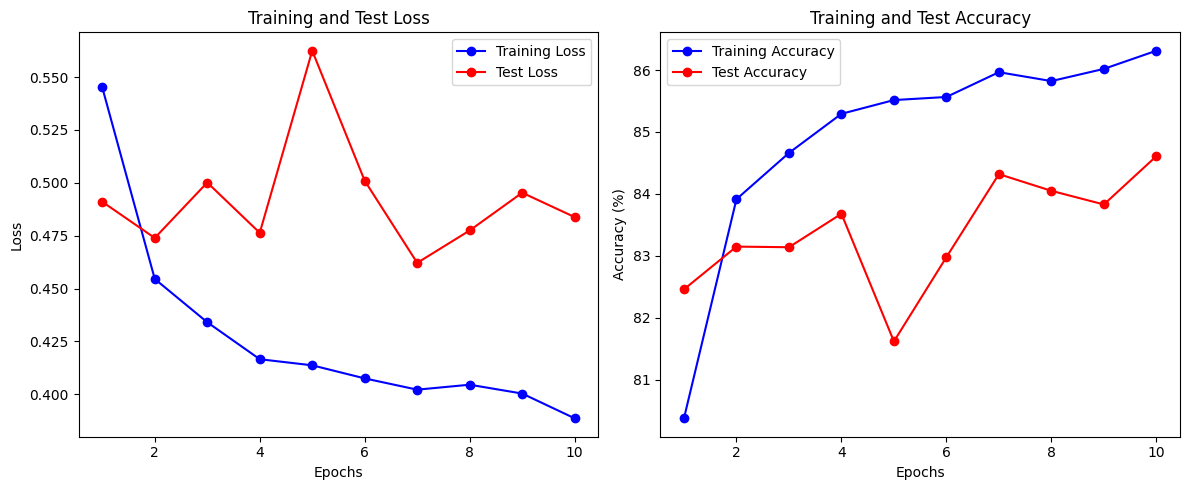

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

---

# 심층신경망 모델 성능 개선 방법

## Dropout

In [ ]:
# 신경망 모델 정의 (Dropout 포함)
class FashionMNISTDropoutModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)  # 50%의 드롭아웃 적용

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # 첫 번째 은닉층 뒤에 드롭아웃 적용
        x = self.fc2(x)# 출력층에는 드롭아웃을 사용하지 않음
        return x

# 모델 인스턴스화
model = FashionMNISTDropoutModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTDropoutModel                 [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─Dropout: 1-3                           [10, 128]                 --
├─Linear: 1-4                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저
# model.parameters() : 학습 가능한 파라미터(가중치와 편향 값)을 가져와서 옵티마이저에 전달

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.9006, Train Accuracy: 67.29%
Test Loss: 0.5903, Test Accuracy: 79.17%
Epoch [2]
Train Loss: 0.8612, Train Accuracy: 69.43%
Test Loss: 0.5724, Test Accuracy: 79.72%
Epoch [3]
Train Loss: 0.8226, Train Accuracy: 70.99%
Test Loss: 0.6146, Test Accuracy: 78.51%
Epoch [4]
Train Loss: 0.8305, Train Accuracy: 70.67%
Test Loss: 0.5697, Test Accuracy: 81.11%
Epoch [5]
Train Loss: 0.8101, Train Accuracy: 71.52%
Test Loss: 0.6254, Test Accuracy: 79.58%
Epoch [6]
Train Loss: 0.8276, Train Accuracy: 71.11%
Test Loss: 0.5905, Test Accuracy: 81.29%
Epoch [7]
Train Loss: 0.8182, Train Accuracy: 71.25%
Test Loss: 0.5772, Test Accuracy: 80.67%
Epoch [8]
Train Loss: 0.8045, Train Accuracy: 71.82%
Test Loss: 0.6224, Test Accuracy: 78.99%
Epoch [9]
Train Loss: 0.8196, Train Accuracy: 71.26%
Test Loss: 0.5634, Test Accuracy: 81.00%
Epoch [10]
Train Loss: 0.8121, Train Accuracy: 70.94%
Test Loss: 0.5952, Test Accuracy: 78.78%


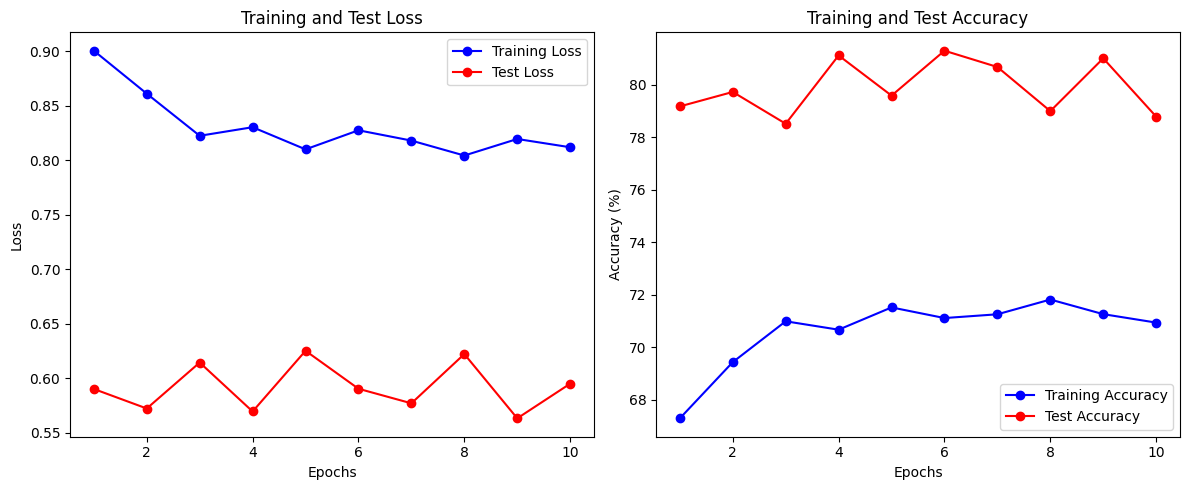

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## BatchNormalization

In [ ]:
# 신경망 모델 정의 (Batch Normalization 및 Dropout 포함)
class FashionMNISTBNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.bn1 = nn.BatchNorm1d(128)  # 첫 번째 배치 정규화 레이어
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)  # 50%의 드롭아웃 적용

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.bn1(self.fc1(x)))  # 첫 번째 배치 정규화 + ReLU
        x = self.dropout(x)  # 드롭아웃 적용
        x = self.fc2(x)  # 출력층에는 배치 정규화 및 드롭아웃을 사용하지 않음
        return x

# 모델 인스턴스화
model = FashionMNISTBNModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTBNModel                      [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─BatchNorm1d: 1-3                       [10, 128]                 256
├─Dropout: 1-4                           [10, 128]                 --
├─Linear: 1-5                            [10, 10]                  1,290
Total params: 102,026
Trainable params: 102,026
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.02
Params size (MB): 0.41
Estimated Total Size (MB): 0.46

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.4725, Train Accuracy: 82.85%
Test Loss: 0.4086, Test Accuracy: 85.33%
Epoch [2]
Train Loss: 0.3738, Train Accuracy: 86.48%
Test Loss: 0.3769, Test Accuracy: 86.45%
Epoch [3]
Train Loss: 0.3423, Train Accuracy: 87.40%
Test Loss: 0.3795, Test Accuracy: 86.35%
Epoch [4]
Train Loss: 0.3258, Train Accuracy: 87.95%
Test Loss: 0.3610, Test Accuracy: 87.05%
Epoch [5]
Train Loss: 0.3081, Train Accuracy: 88.65%
Test Loss: 0.3486, Test Accuracy: 87.49%
Epoch [6]
Train Loss: 0.2964, Train Accuracy: 88.94%
Test Loss: 0.3507, Test Accuracy: 87.30%
Epoch [7]
Train Loss: 0.2840, Train Accuracy: 89.41%
Test Loss: 0.3434, Test Accuracy: 87.87%
Epoch [8]
Train Loss: 0.2772, Train Accuracy: 89.78%
Test Loss: 0.3347, Test Accuracy: 88.25%
Epoch [9]
Train Loss: 0.2674, Train Accuracy: 90.14%
Test Loss: 0.3468, Test Accuracy: 88.23%
Epoch [10]
Train Loss: 0.2579, Train Accuracy: 90.42%
Test Loss: 0.3427, Test Accuracy: 87.92%


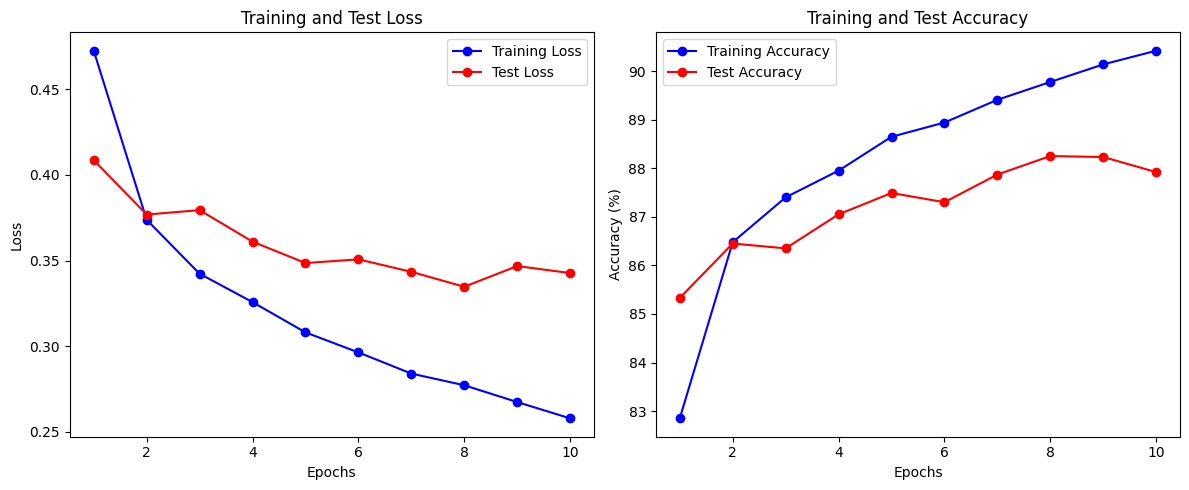

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

---

# 합성곱 신경망

$$O_w = \frac{W - F + 2P}{S} + 1$$

$$O_h = \frac{H - F + 2P}{S} + 1$$

In [ ]:
def conv2d_output_size(input_size, kernel_size, stride=1, padding=0):
    height, width = input_size

    # Convolution 공식 적용
    out_height = (height + 2 * padding - kernel_size) // stride + 1
    out_width = (width + 2 * padding - kernel_size) // stride + 1

    return out_height, out_width

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (26, 26)


In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (28, 28)


In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (13, 13)


In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (14, 14)


## 모델정의

In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# 모델 인스턴스 생성 및 디바이스로 이동 (예: GPU 사용 가능 시 GPU로 이동)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

# 모델 요약 출력 (입력 크기: 배치 크기 64, 채널 1, 28x28 크기의 이미지)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           4,640
         MaxPool2d-4             [-1, 32, 7, 7]               0
           Flatten-5                 [-1, 1568]               0
            Linear-6                  [-1, 128]         200,832
            Linear-7                   [-1, 10]           1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 0.79
Estimated Total Size (MB): 0.98
----------------------------------------------------------------


In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.7881, Train Accuracy: 74.35%
Test Loss: 0.5240, Test Accuracy: 80.81%
Epoch [2]
Train Loss: 0.4671, Train Accuracy: 83.07%
Test Loss: 0.4738, Test Accuracy: 83.00%
Epoch [3]
Train Loss: 0.4132, Train Accuracy: 85.26%
Test Loss: 0.4090, Test Accuracy: 85.12%
Epoch [4]
Train Loss: 0.3788, Train Accuracy: 86.46%
Test Loss: 0.3931, Test Accuracy: 85.94%
Epoch [5]
Train Loss: 0.3570, Train Accuracy: 87.30%
Test Loss: 0.3796, Test Accuracy: 86.54%
Epoch [6]
Train Loss: 0.3397, Train Accuracy: 88.04%
Test Loss: 0.3538, Test Accuracy: 87.33%
Epoch [7]
Train Loss: 0.3248, Train Accuracy: 88.43%
Test Loss: 0.3519, Test Accuracy: 86.71%
Epoch [8]
Train Loss: 0.3156, Train Accuracy: 88.81%
Test Loss: 0.3387, Test Accuracy: 87.84%
Epoch [9]
Train Loss: 0.3040, Train Accuracy: 89.11%
Test Loss: 0.3273, Test Accuracy: 88.30%
Epoch [10]
Train Loss: 0.2957, Train Accuracy: 89.44%
Test Loss: 0.3210, Test Accuracy: 88.52%


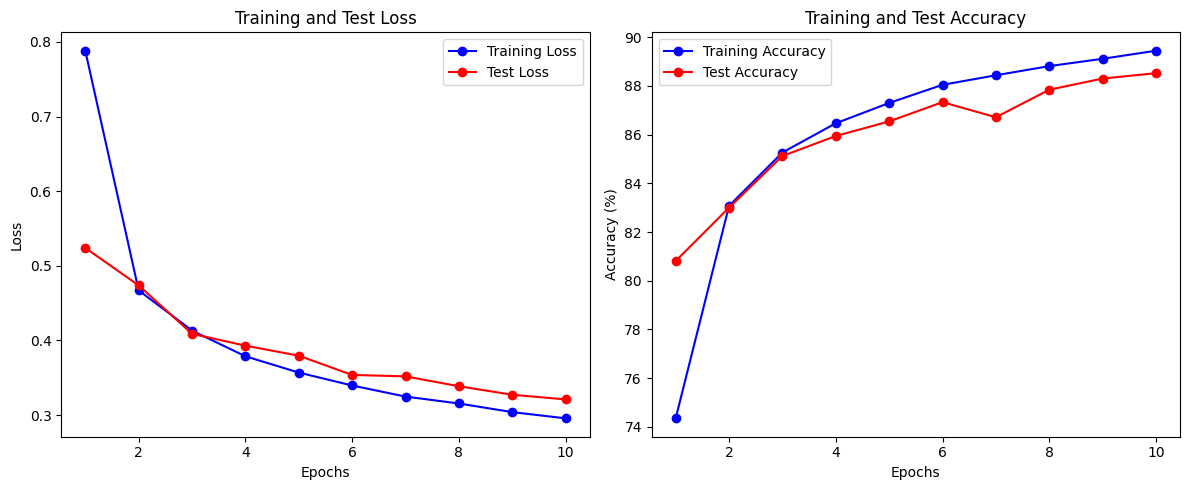

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 전이학습

In [ ]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
# pretrained=True : 사전 학습된 가중치(매개변수)를 사용하여 모델을 로드
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (1, 28, 28))

Pretrained weights loaded successfully on cpu.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           2,320
              ReLU-4           [-1, 16, 28, 28]               0
         MaxPool2d-5           [-1, 16, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           4,640
              ReLU-7           [-1, 32, 14, 14]               0
            Conv2d-8           [-1, 32, 14, 14]           9,248
              ReLU-9           [-1, 32, 14, 14]               0
        MaxPool2d-10             [-1, 32, 7, 7]               0
           Linear-11                  [-1, 128]         200,832
             ReLU-12                  [-1, 128]               0
           Linear-13                   [-1, 10]         

/usr/local/lib/python3.10/dist-packages/JAEN/models.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location=device))


In [ ]:
# 모델의 컨볼루션 레이어(conv_layers)에 속한 모든 파라미터를 가져와 동결
for param in model.conv_layers.parameters():
    # 각 파라미터의 requires_grad 속성을 False로 설정하여 학습 중에 업데이트되지 않도록 함
    # 이렇게 하면 해당 파라미터들은 역전파(Backpropagation) 단계에서 기울기 계산을 하지 않음
    param.requires_grad = False

In [ ]:
# 새로운 Fully Connected Block 설정
# 기존의 Fully Connected 레이어를 새로운 레이어로 교체
model.fc_layers = nn.Sequential(
    nn.Linear(32 * 7 * 7, 64),  # 첫 번째 은닉층
    nn.ReLU(),
    nn.Dropout(p=0.5),           # 드롭아웃 추가
    nn.Linear(64, 10)           # 출력층 (활성화 함수 없음)
)

# 디바이스 설정 (GPU 또는 CPU)
model.to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           2,320
              ReLU-4           [-1, 16, 28, 28]               0
         MaxPool2d-5           [-1, 16, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           4,640
              ReLU-7           [-1, 32, 14, 14]               0
            Conv2d-8           [-1, 32, 14, 14]           9,248
              ReLU-9           [-1, 32, 14, 14]               0
        MaxPool2d-10             [-1, 32, 7, 7]               0
           Linear-11                   [-1, 64]         100,416
             ReLU-12                   [-1, 64]               0
          Dropout-13                   [-1, 64]               0
           Linear-14                   

In [ ]:
# 손실 함수와 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
# model.parameters() 중 requires_grad가 True인 파라미터들만 업데이트하도록 설정
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.8846, Train Accuracy: 72.11%
Test Loss: 0.5224, Test Accuracy: 82.71%
Epoch [2]
Train Loss: 0.5560, Train Accuracy: 81.65%
Test Loss: 0.4481, Test Accuracy: 84.67%
Epoch [3]
Train Loss: 0.4834, Train Accuracy: 83.80%
Test Loss: 0.4143, Test Accuracy: 85.76%
Epoch [4]
Train Loss: 0.4473, Train Accuracy: 84.88%
Test Loss: 0.3931, Test Accuracy: 86.27%
Epoch [5]
Train Loss: 0.4218, Train Accuracy: 85.71%
Test Loss: 0.3792, Test Accuracy: 86.50%
Epoch [6]
Train Loss: 0.4033, Train Accuracy: 86.45%
Test Loss: 0.3681, Test Accuracy: 87.08%
Epoch [7]
Train Loss: 0.3845, Train Accuracy: 86.74%
Test Loss: 0.3607, Test Accuracy: 87.29%
Epoch [8]
Train Loss: 0.3731, Train Accuracy: 87.22%
Test Loss: 0.3527, Test Accuracy: 87.44%
Epoch [9]
Train Loss: 0.3634, Train Accuracy: 87.39%
Test Loss: 0.3474, Test Accuracy: 87.61%
Epoch [10]
Train Loss: 0.3541, Train Accuracy: 87.73%
Test Loss: 0.3414, Test Accuracy: 87.62%


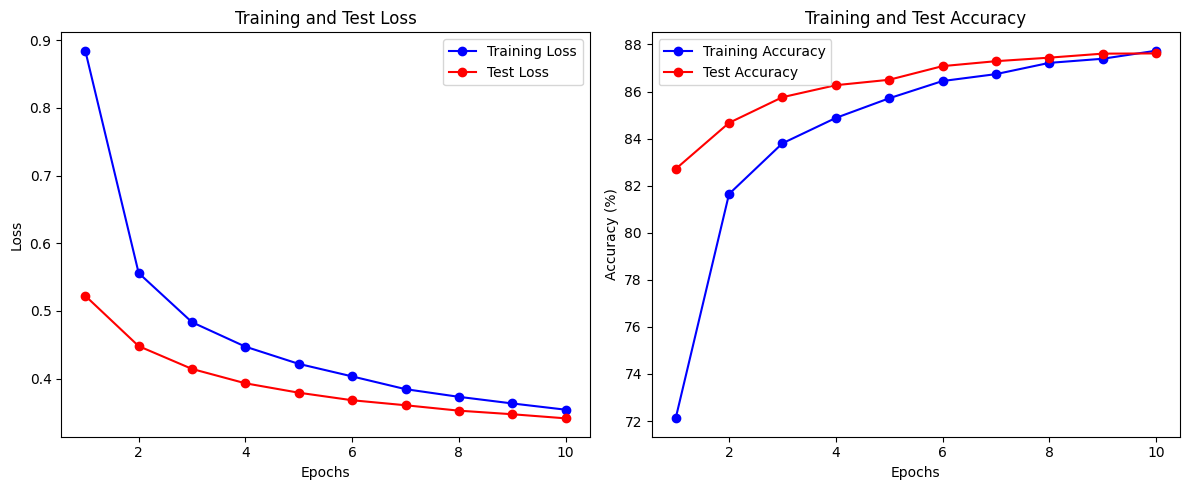

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 미세조정

In [ ]:
# 1. 모든 파라미터 학습 불가능하게 설정 (고정)
for param in model.parameters():
    param.requires_grad = False

# 2. 두 개의 컨볼루션 레이어만 학습 가능하도록 설정
# conv_layers[6]와 conv_layers[8] 레이어를 학습 가능하도록 설정
for param in model.features[6].parameters():  # VGG16을 가정
    param.requires_grad = True
for param in model.features[8].parameters():  # VGG16을 가정
    param.requires_grad = True

In [ ]:
# 손실 함수와 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.3475, Train Accuracy: 88.02%
Test Loss: 0.3384, Test Accuracy: 87.86%
Epoch [2]
Train Loss: 0.3370, Train Accuracy: 88.39%
Test Loss: 0.3343, Test Accuracy: 88.03%
Epoch [3]
Train Loss: 0.3299, Train Accuracy: 88.50%
Test Loss: 0.3313, Test Accuracy: 88.06%
Epoch [4]
Train Loss: 0.3254, Train Accuracy: 88.70%
Test Loss: 0.3283, Test Accuracy: 88.07%
Epoch [5]
Train Loss: 0.3206, Train Accuracy: 88.84%
Test Loss: 0.3274, Test Accuracy: 88.10%
Epoch [6]
Train Loss: 0.3128, Train Accuracy: 89.12%
Test Loss: 0.3245, Test Accuracy: 88.29%
Epoch [7]
Train Loss: 0.3089, Train Accuracy: 89.22%
Test Loss: 0.3238, Test Accuracy: 88.41%
Epoch [8]
Train Loss: 0.3063, Train Accuracy: 89.29%
Test Loss: 0.3215, Test Accuracy: 88.27%
Epoch [9]
Train Loss: 0.2991, Train Accuracy: 89.48%
Test Loss: 0.3214, Test Accuracy: 88.46%
Epoch [10]
Train Loss: 0.2938, Train Accuracy: 89.67%
Test Loss: 0.3199, Test Accuracy: 88.47%


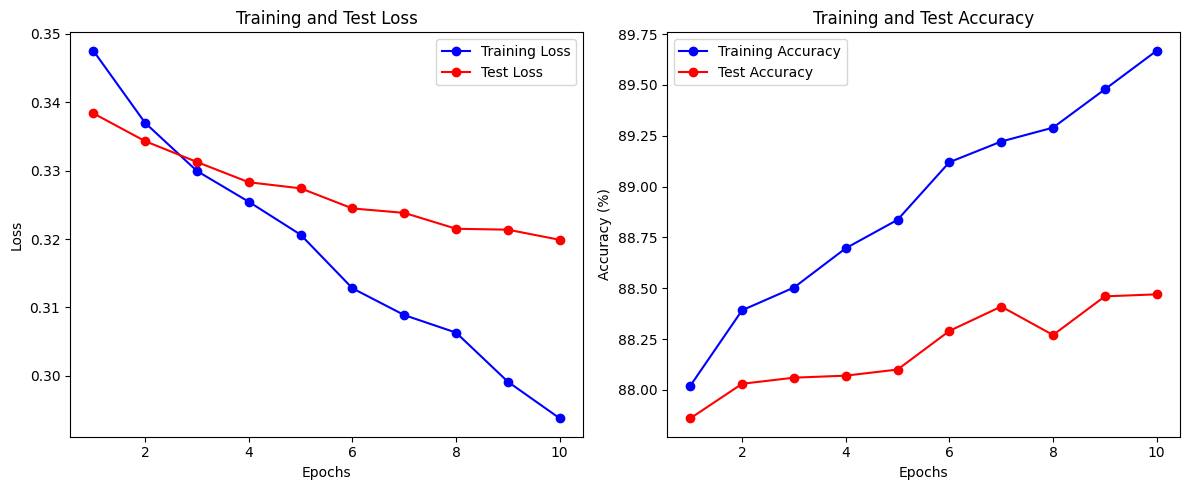

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

### VGG16 전이학습

In [ ]:
# 실제 전이학습
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# 1. 데이터 전처리 (사전 학습된 모델을 위한 변환)
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # VGG16은 224x224를 사용하지만, 여기서는 32x32로 조정 (224/32=7)
    transforms.Grayscale(3),  # 흑백 이미지(1채널)를 RGB(3채널)로 변환
    transforms.ToTensor(),  # 데이터를 Tensor로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 정규화
])

# 2. Fashion MNIST 데이터셋 불러오기
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. 사전 학습된 VGG16 모델 불러오기
model = models.vgg16(pretrained=True)
# 사전 학습된 모델의 가중치를 고정
for param in model.parameters():
    param.requires_grad = False

# 4. 마지막 분류 레이어 수정 (Fashion MNIST의 10개 클래스에 맞게 수정)
model.classifier[6] = nn.Linear(4096, 10)

# 5. GPU 사용 가능 시 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
summary(model, (10, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [10, 10]                  --
├─Sequential: 1-1                        [10, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [10, 64, 32, 32]          (1,792)
│    └─ReLU: 2-2                         [10, 64, 32, 32]          --
│    └─Conv2d: 2-3                       [10, 64, 32, 32]          (36,928)
│    └─ReLU: 2-4                         [10, 64, 32, 32]          --
│    └─MaxPool2d: 2-5                    [10, 64, 16, 16]          --
│    └─Conv2d: 2-6                       [10, 128, 16, 16]         (73,856)
│    └─ReLU: 2-7                         [10, 128, 16, 16]         --
│    └─Conv2d: 2-8                       [10, 128, 16, 16]         (147,584)
│    └─ReLU: 2-9                         [10, 128, 16, 16]         --
│    └─MaxPool2d: 2-10                   [10, 128, 8, 8]           --
│    └─Conv2d: 2-11                      [10, 256, 8, 8]     